In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('carprice.csv')
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.shape

(205, 26)

In [9]:
df.dtypes

ID                    int64
symboling             int64
name                 object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


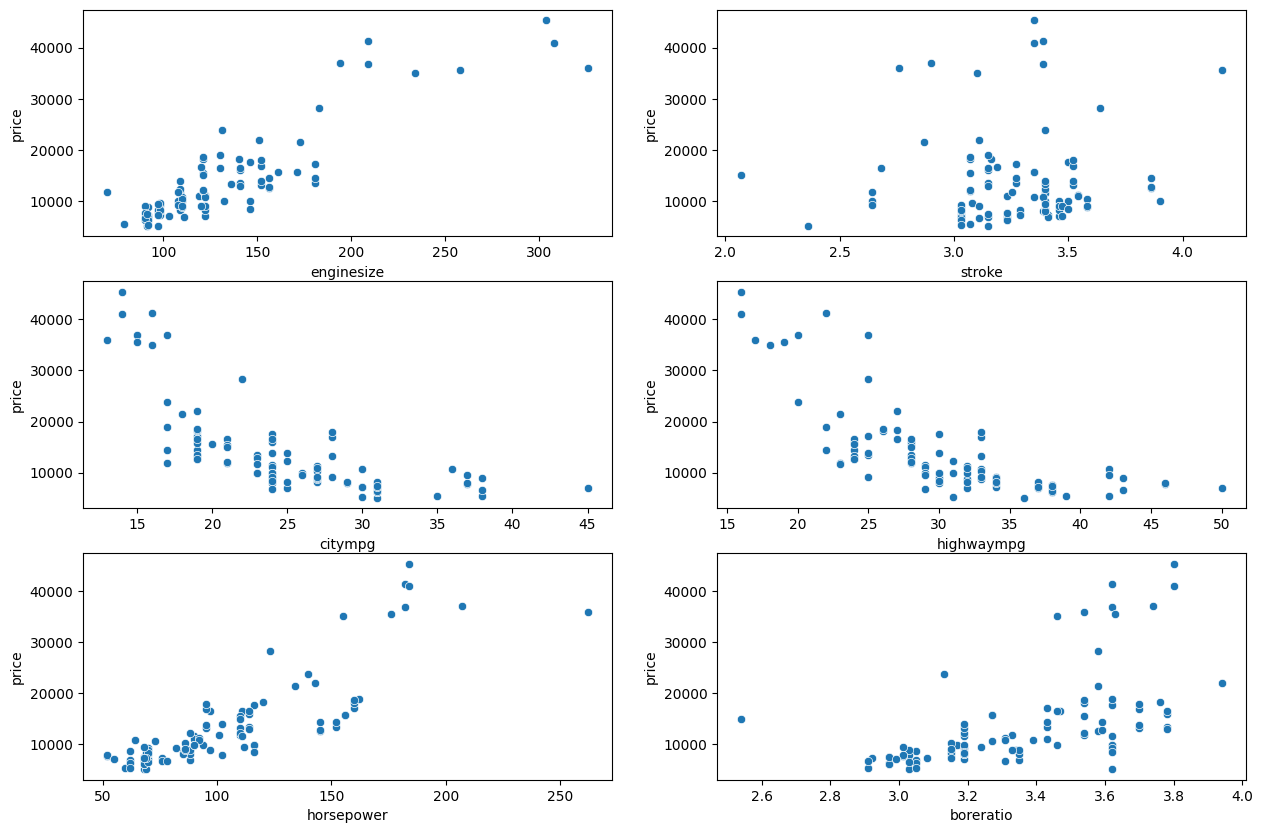

In [11]:
#creating a scatter plot of price versus engine size, stroke, city and highway mpg, horsepower, and bore ratio

subset = df.sample(n=100)
fig, axs = plt.subplots(3,2, figsize = (15,10))
plt1 = sns.scatterplot(data =subset, x= 'enginesize', y = 'price', ax = axs[0,0])
plt1 = sns.scatterplot(data =subset, x= 'stroke', y = 'price', ax = axs[0,1])
plt1 = sns.scatterplot(data =subset, x= 'citympg', y = 'price', ax = axs[1,0])
plt1 = sns.scatterplot(data =subset, x= 'highwaympg', y = 'price', ax = axs[1,1])
plt1 = sns.scatterplot(data =subset, x= 'horsepower', y = 'price', ax = axs[2,0])
plt1 = sns.scatterplot(data =subset, x= 'boreratio', y = 'price', ax = axs[2,1])

In [12]:
#LINEAR REGRESSION

In [13]:
# MODEL 1 : enginesize vs. price

#single variable linear regression

X = df['enginesize']
y = df['price']
X

import statsmodels.api as sm
X =sm.add_constant(X)
X

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

price = 167.6984 * df['enginesize'] - 8005.4455
print(price[0])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.35e-65
Time:                        11:51:38   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [14]:
# MODEL 2 : enginesize and stroke vs. price 

X = df[['enginesize', 'stroke']]
y = df['price']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

price = 171.6866 * df['enginesize']  - 2607.1912 * df['stroke'] - 24.0889
print(price[0])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     346.2
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           5.39e-66
Time:                        11:51:38   Log-Likelihood:                -1980.0
No. Observations:                 205   AIC:                             3966.
Df Residuals:                     202   BIC:                             3976.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0889   2797.415     -0.009      0.9

In [15]:
# MODEL 3 : enginesize, stroke, and city mpg vs. price

X = df[['enginesize', 'stroke', 'citympg']]
y = df['price']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

price = 147.6429 * df['enginesize']  - 2158.6268 * df['stroke'] -227.4554 * df['citympg'] + 7303.2898
print(price[0])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     257.8
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.27e-68
Time:                        11:51:38   Log-Likelihood:                -1970.7
No. Observations:                 205   AIC:                             3949.
Df Residuals:                     201   BIC:                             3963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7303.2898   3161.891      2.310      0.0

In [16]:
# MODEL 4 : enginesize, stroke, citympg, and highwaympg vs. price

X = df[['enginesize', 'stroke', 'citympg', 'highwaympg']]
y = df['price']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

price = 147.9189 * df['enginesize'] - 2163.6566 * df['stroke'] -248.3249 * df['citympg'] + 21.5245 * df['highwaympg'] + 7149.0453
print(price[0])


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           2.20e-67
Time:                        11:51:38   Log-Likelihood:                -1970.7
No. Observations:                 205   AIC:                             3951.
Df Residuals:                     200   BIC:                             3968.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7149.0453   3374.207      2.119      0.0

In [17]:
# MODEL 5 : enginesize, stroke, citympg, highwaympg, and horsepower vs. price

X = df[['enginesize', 'stroke', 'citympg', 'highwaympg', 'horsepower']]
y = df['price']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

price = 125.1924 * df['enginesize'] - 1898.6002 * df['stroke'] + 7.0876 * df['citympg']
- 116.0881 * df['highwaympg'] + 43.0873 * df['horsepower'] + 2474.5964
print(price[0])



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           4.00e-68
Time:                        11:51:38   Log-Likelihood:                -1966.1
No. Observations:                 205   AIC:                             3944.
Df Residuals:                     199   BIC:                             3964.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2474.5964   3655.995      0.677      0.4

In [18]:
# MODEL 6 : enginesize, stroke, citympg, highwaympg, and horsepower vs. price

X = df[['enginesize', 'stroke', 'citympg', 'highwaympg', 'horsepower', 'boreratio']]
y = df['price']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

price = 126.4840 * df['enginesize'] - 1963.9073 * df['stroke'] + 1.1811 * df['citympg'] 
- 117.1022 * df['highwaympg'] + 43.0863 * df['horsepower'] - 503.3486 * df['boreratio'] 
+ 4379.5548
print(price[0])


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           4.94e-67
Time:                        11:51:38   Log-Likelihood:                -1966.0
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     198   BIC:                             3969.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4379.5548   5945.876      0.737      0.4

In [19]:
#PLOTTING VISUAL AIDS

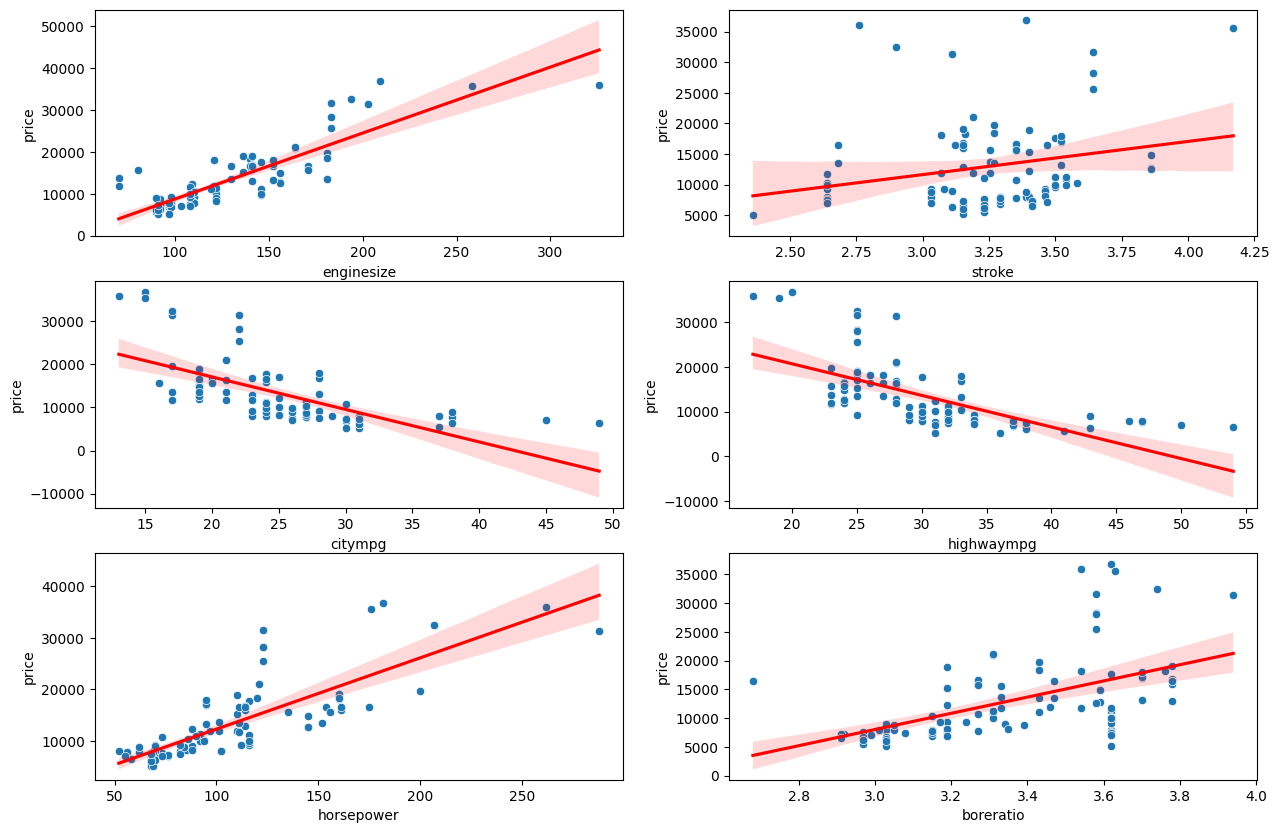

In [20]:
subset = df.sample(n=100)
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

sns.scatterplot(data=subset, x='enginesize', y='price', ax=axs[0, 0])
sns.regplot(data=subset, x='enginesize', y='price', ax=axs[0, 0], scatter=False, color='red')

sns.scatterplot(data=subset, x='stroke', y='price', ax=axs[0, 1])
sns.regplot(data=subset, x='stroke', y='price', ax=axs[0, 1], scatter=False, color='red')

sns.scatterplot(data=subset, x='citympg', y='price', ax=axs[1, 0])
sns.regplot(data=subset, x='citympg', y='price', ax=axs[1, 0], scatter=False, color='red')

sns.scatterplot(data=subset, x='highwaympg', y='price', ax=axs[1, 1])
sns.regplot(data=subset, x='highwaympg', y='price', ax=axs[1, 1], scatter=False, color='red')

sns.scatterplot(data=subset, x='horsepower', y='price', ax=axs[2, 0])
sns.regplot(data=subset, x='horsepower', y='price', ax=axs[2, 0], scatter=False, color='red')

sns.scatterplot(data=subset, x='boreratio', y='price', ax=axs[2, 1])
sns.regplot(data=subset, x='boreratio', y='price', ax=axs[2, 1], scatter=False, color='red')

plt.show()

C:\Users\Sanjo George\AppData\Local\Temp\ipykernel_19820\3699639805.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=list(coefficients.keys()), y=list(coefficients.values()), ci='sd')


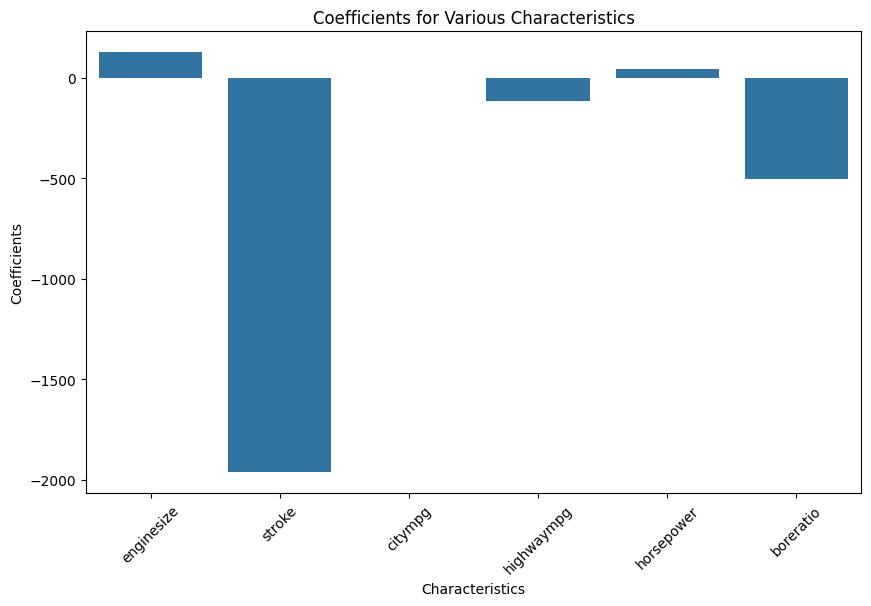

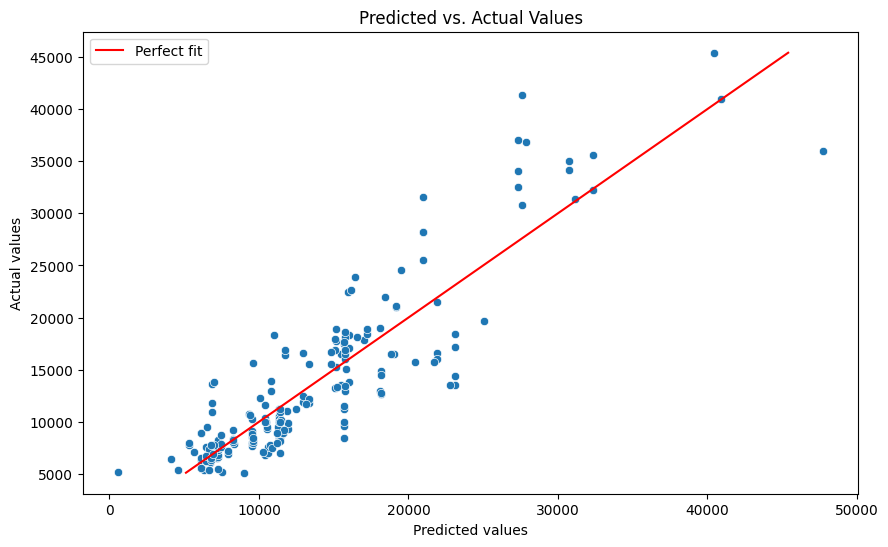

In [21]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the coefficients and their standard errors
coefficients = {
    'enginesize': 126.4840,
    'stroke': -1963.9073,
    'citympg': 1.1811,
    'highwaympg': -117.1022,
    'horsepower': 43.0863,
    'boreratio': -503.3486
}
intercept = 4379.5548

# Coefficients plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(coefficients.keys()), y=list(coefficients.values()), ci='sd')
plt.xlabel('Characteristics')
plt.ylabel('Coefficients')
plt.title('Coefficients for Various Characteristics')
plt.xticks(rotation=45)
plt.show()

# Predicted vs. Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lm_2.fittedvalues, y=y)
sns.lineplot(x=y, y=y, color='red', label='Perfect fit')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [25]:
# PREDICTION

# Define the example characteristics of the car
car_characteristics = {
    'enginesize': int(input('Please enter the engine size:')),
    'stroke': int(input('Please enter the stroke:')),
    'citympg': int(input('Please enter the city MPG:')),
    'highwaympg': int(input('Please enter the highway MPG:')),
    'horsepower': int(input('Please enter the horsepower:')),
    'boreratio': int(input('Please enter the bore ratio:'))
}

# Calculate the predicted price using the equation
predicted_price = intercept
for variable, coefficient in coefficients.items():
    predicted_price += coefficient * car_characteristics[variable]

print(f'Predicted price of a car with the following characteristics: {car_characteristics} is: {round(predicted_price)}')

Please enter the engine size: 304
Please enter the stroke: 4
Please enter the city MPG: 156
Please enter the highway MPG: 200
Please enter the horsepower: 300
Please enter the bore ratio: 4


Predicted price of a car with the following characteristics: {'enginesize': 304, 'stroke': 4, 'citympg': 156, 'highwaympg': 200, 'horsepower': 300, 'boreratio': 4} is: 22651
